In [42]:
import os
import keras
import seaborn
import pandas as pd

from tqdm import tqdm
from keras.models import load_model
import tensorflow as tf

from tensorflow.keras.preprocessing.image import load_img, img_to_array

import numpy as np
import scipy
from numpy import expand_dims

from keras.applications.vgg19 import preprocess_input

import matplotlib.pyplot as plt

## Importation des dessins

In [43]:
# importation des données

categories = ['Crèche','PS','MS','GS','CE1','CE2','CM1','CM2','NOV','EXP']
#categories.remove('.ipynb_checkpoints')
drawings = []
labels = []
indices = []

for folder in categories:
    tmp_repertory = 'Dessins_humains/' + folder
    #print(folder)
    for img in os.listdir(tmp_repertory):
        if not img.startswith('.'):
            indices.append(tmp_repertory + '/' + img)
            labels.append(folder)
            img = load_img(tmp_repertory + '/' + img, target_size=(224,224,3))
            img = img_to_array(img)
            img = expand_dims(img,axis=0)
            img = preprocess_input(img)
            img = np.array(img)
            img = np.reshape(img, (1,224,224,3))
            drawings.append(img)

In [15]:
# Pour chaque modèle couple VS NOV+EXP, on regarde comment sont classifiés les autres groupes

# liste de toutes les catégories (sauf adultes)
categories = ['Crèche','PS','MS','GS','CE1','CE2','CM1','CM2']

for i in tqdm(range(len(categories)-1)):
    categories = ['Crèche','PS','MS','GS','CE1','CE2','CM1','CM2']
    categories_model = categories[i:(i+2)]
    model = load_model('models/' + categories_model[0] + categories_model[1] + '/model_' + categories_model[0] + categories_model[1] + '.h5')

100%|██████████| 7/7 [00:03<00:00,  2.03it/s]


In [26]:
list(range(len(categories)-1))

[0, 1, 2, 3, 4, 5, 6]

100%|██████████| 7/7 [07:43<00:00, 66.25s/it]


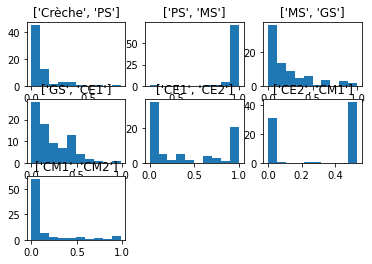

In [50]:
categories = ['Crèche','PS','MS','GS','CE1','CE2','CM1','CM2']
# Vérifier que pour chaque modèle, valeur proche de 0 = enfants et 1 = adultes
# Pour un modèle (par ex CrèchePS vs adultes), on donne tous les dessins CrèchePS et on regarde si les valeurs prédites sont petites
for i in tqdm(range(len(categories)-1)):
    plt.subplot(3, 3, (i+1)) 
    categories = ['Crèche','PS','MS','GS','CE1','CE2','CM1','CM2']
    categories_model = categories[i:(i+2)]
    categories_to_predict = categories_model # on veut préd
    predictions = []
    predictions_true_label = []
    pred_names = []
    pred_dict = {category:[] for category in categories_to_predict}
    mean_pred = []
    sd_pred = []
    for category in categories_to_predict: # pour les 2 catégories enfants sur lesquels le modèle a été entrainé
        tmp_indices = np.where(np.array(labels)==category)[0] # on extrait les indices des dessins de ces catégories
        for idx in tmp_indices: # pour chaque dessin de cette catégorie
            # on prédit le groupe
            model = load_model('models/' + categories_model[0] + categories_model[1] + '/model_' + categories_model[0] + categories_model[1] + '.h5')
            tmp_pred = model.predict(drawings[idx])
            pred_dict[category].append(tmp_pred)
            # on rajoute la valeur de la prédiction dans une autre liste, ainsi que le vrai label, et le nom (pour retrouver le dessinateur)
            predictions.append(tmp_pred[0][0]) # on rajoute la valeur de la prédiction pour ce dessin
            predictions_true_label.append(category) # on rajoute le vrai label de ce dessin
    plt.title(categories_to_predict)
    plt.hist(predictions)

100%|██████████| 7/7 [08:13<00:00, 70.44s/it]


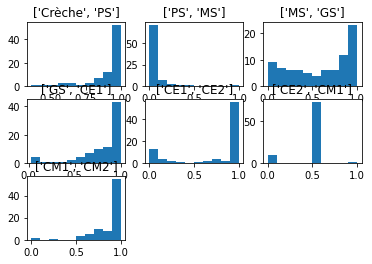

In [49]:
# Vérifier que pour chaque modèle, valeur proche de 0 = enfants et 1 = adultes
# Pour un modèle (par ex CrèchePS vs adultes), on donne tous les dessins CrèchePS et on regarde si les valeurs prédites sont petites
for i in tqdm(range(len(['Crèche','PS','MS','GS','CE1','CE2','CM1','CM2'])-1)):
    plt.subplot(3, 3, (i+1)) 
    categories = ['Crèche','PS','MS','GS','CE1','CE2','CM1','CM2','NOV','EXP']
    categories_model = categories[i:(i+2)]
    categories_to_predict = ['NOV','EXP'] # on veut préd
    predictions = []
    predictions_true_label = []
    pred_names = []
    pred_dict = {category:[] for category in categories_to_predict}
    mean_pred = []
    sd_pred = []
    for category in categories_to_predict: # pour les 2 catégories enfants sur lesquels le modèle a été entrainé
        tmp_indices = np.where(np.array(labels)==category)[0] # on extrait les indices des dessins de ces catégories
        for idx in tmp_indices: # pour chaque dessin de cette catégorie
            # on prédit le groupe
            model = load_model('models/' + categories_model[0] + categories_model[1] + '/model_' + categories_model[0] + categories_model[1] + '.h5')
            tmp_pred = model.predict(drawings[idx])
            pred_dict[category].append(tmp_pred)
            # on rajoute la valeur de la prédiction dans une autre liste, ainsi que le vrai label, et le nom (pour retrouver le dessinateur)
            predictions.append(tmp_pred[0][0]) # on rajoute la valeur de la prédiction pour ce dessin
            predictions_true_label.append(category) # on rajoute le vrai label de ce dessin
    plt.title(categories_model)
    plt.hist(predictions)

In [ ]:
#CrèchePS : adultes = 1
#PSMS : adultes = 0
#MSGS : adultes = 1
#GSCE1 : adultes = 1
#CE1CE2 : adultes = 1
#CE2CM1 : adultes = 1
#CM1CM2 : adultes = 1

In [52]:
# Pour chaque modèle couple VS NOV+EXP, on regarde comment sont classifiés les autres groupes

# liste de toutes les catégories (sauf adultes)
categories = ['Crèche','PS','MS','GS','CE1','CE2','CM1','CM2']

# création du dataframe qui contiendra les résultats
categories_couple = []
for j in range(len(categories)-1):
    categories_couple.append(categories[j]+categories[j+1])
matrix_pred = np.full((len(categories)-1,len(categories)),np.NaN)
matrix_pred = pd.DataFrame(matrix_pred, columns=categories, index=categories_couple)
print(matrix_pred)

for i in tqdm(range(len(categories)-1)):
    categories = ['Crèche','PS','MS','GS','CE1','CE2','CM1','CM2']
    categories_model = categories[i:(i+2)]
    del categories[i:(i+2)]
    categories_to_predict = categories

    predictions = []
    predictions_true_label = []
    pred_names = []
    pred_dict = {category:[] for category in categories_to_predict}
    mean_pred = []
    sd_pred = []

    model = load_model('models/' + categories_model[0] + categories_model[1] + '/model_' + categories_model[0] + categories_model[1] + '.h5')
    for category in categories_to_predict: # pour chaque catégorie
        tmp_indices = np.where(np.array(labels)==category)[0]
        for idx in tmp_indices: # pour chaque dessin de cette catégorie
            # on prédit le groupe
            tmp_pred = model.predict(drawings[idx])
            # on rajoute la valeur de la prédiction dans le dictionnaire
            pred_dict[category].append(tmp_pred)
            # on rajoute la valeur de la prédiction dans une autre liste, ainsi que le vrai label, et le nom (pour retrouver le dessinateur)
            predictions.append(tmp_pred[0][0]) # on rajoute la valeur de la prédiction pour ce dessin
            predictions_true_label.append(category) # on rajoute le vrai label de ce dessin
            # on prend le chemin du dessin pour extraire le nom du dessinateur
            path_name = indices[idx]
            pred_names.append(path_name.split('/')[2].split('.')[0])
        print(category)
        mean_pred.append(np.mean(pred_dict[category]))
        sd_pred.append(np.std(pred_dict[category]))
        k=0
        for categorie_to_predict in categories_to_predict:
            matrix_pred.iloc[i, matrix_pred.columns.get_loc(categorie_to_predict)] = mean_pred[k]
            k+=1

          Crèche  PS  MS  GS  CE1  CE2  CM1  CM2
CrèchePS     NaN NaN NaN NaN  NaN  NaN  NaN  NaN
PSMS         NaN NaN NaN NaN  NaN  NaN  NaN  NaN
MSGS         NaN NaN NaN NaN  NaN  NaN  NaN  NaN
GSCE1        NaN NaN NaN NaN  NaN  NaN  NaN  NaN
CE1CE2       NaN NaN NaN NaN  NaN  NaN  NaN  NaN
CE2CM1       NaN NaN NaN NaN  NaN  NaN  NaN  NaN
CM1CM2       NaN NaN NaN NaN  NaN  NaN  NaN  NaN


  0%|          | 0/7 [00:00<?, ?it/s]

MS
GS
CE1
CE2
CM1


 14%|█▍        | 1/7 [00:57<05:43, 57.33s/it]

CM2
Crèche
GS
CE1
CE2
CM1


 29%|██▊       | 2/7 [01:54<04:45, 57.05s/it]

CM2
Crèche
PS
CE1
CE2
CM1


 43%|████▎     | 3/7 [02:48<03:43, 55.77s/it]

CM2
Crèche
PS
MS
CE2
CM1


 57%|█████▋    | 4/7 [03:42<02:45, 55.13s/it]

CM2
Crèche
PS
MS
GS
CM1


 71%|███████▏  | 5/7 [04:39<01:51, 55.73s/it]

CM2
Crèche
PS
MS
GS
CE1


 86%|████████▌ | 6/7 [05:37<00:56, 56.48s/it]

CM2
Crèche
PS
MS
GS
CE1


100%|██████████| 7/7 [06:32<00:00, 56.11s/it]

CE2


In [64]:
matrix_pred.iloc[1] = 1-matrix_pred.iloc[1]
# comme le modèle PSMS vs adultes est le seul pour lequel adultes=0 et enfants=1, on fait 1-pred pour avoir adultes=1 et enfants=0

<AxesSubplot:>

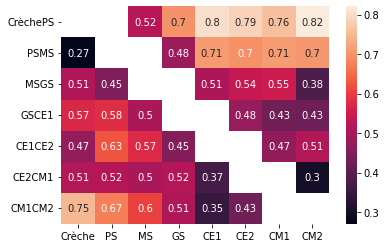

In [66]:
seaborn.heatmap(matrix_pred,annot=True)

<AxesSubplot:>

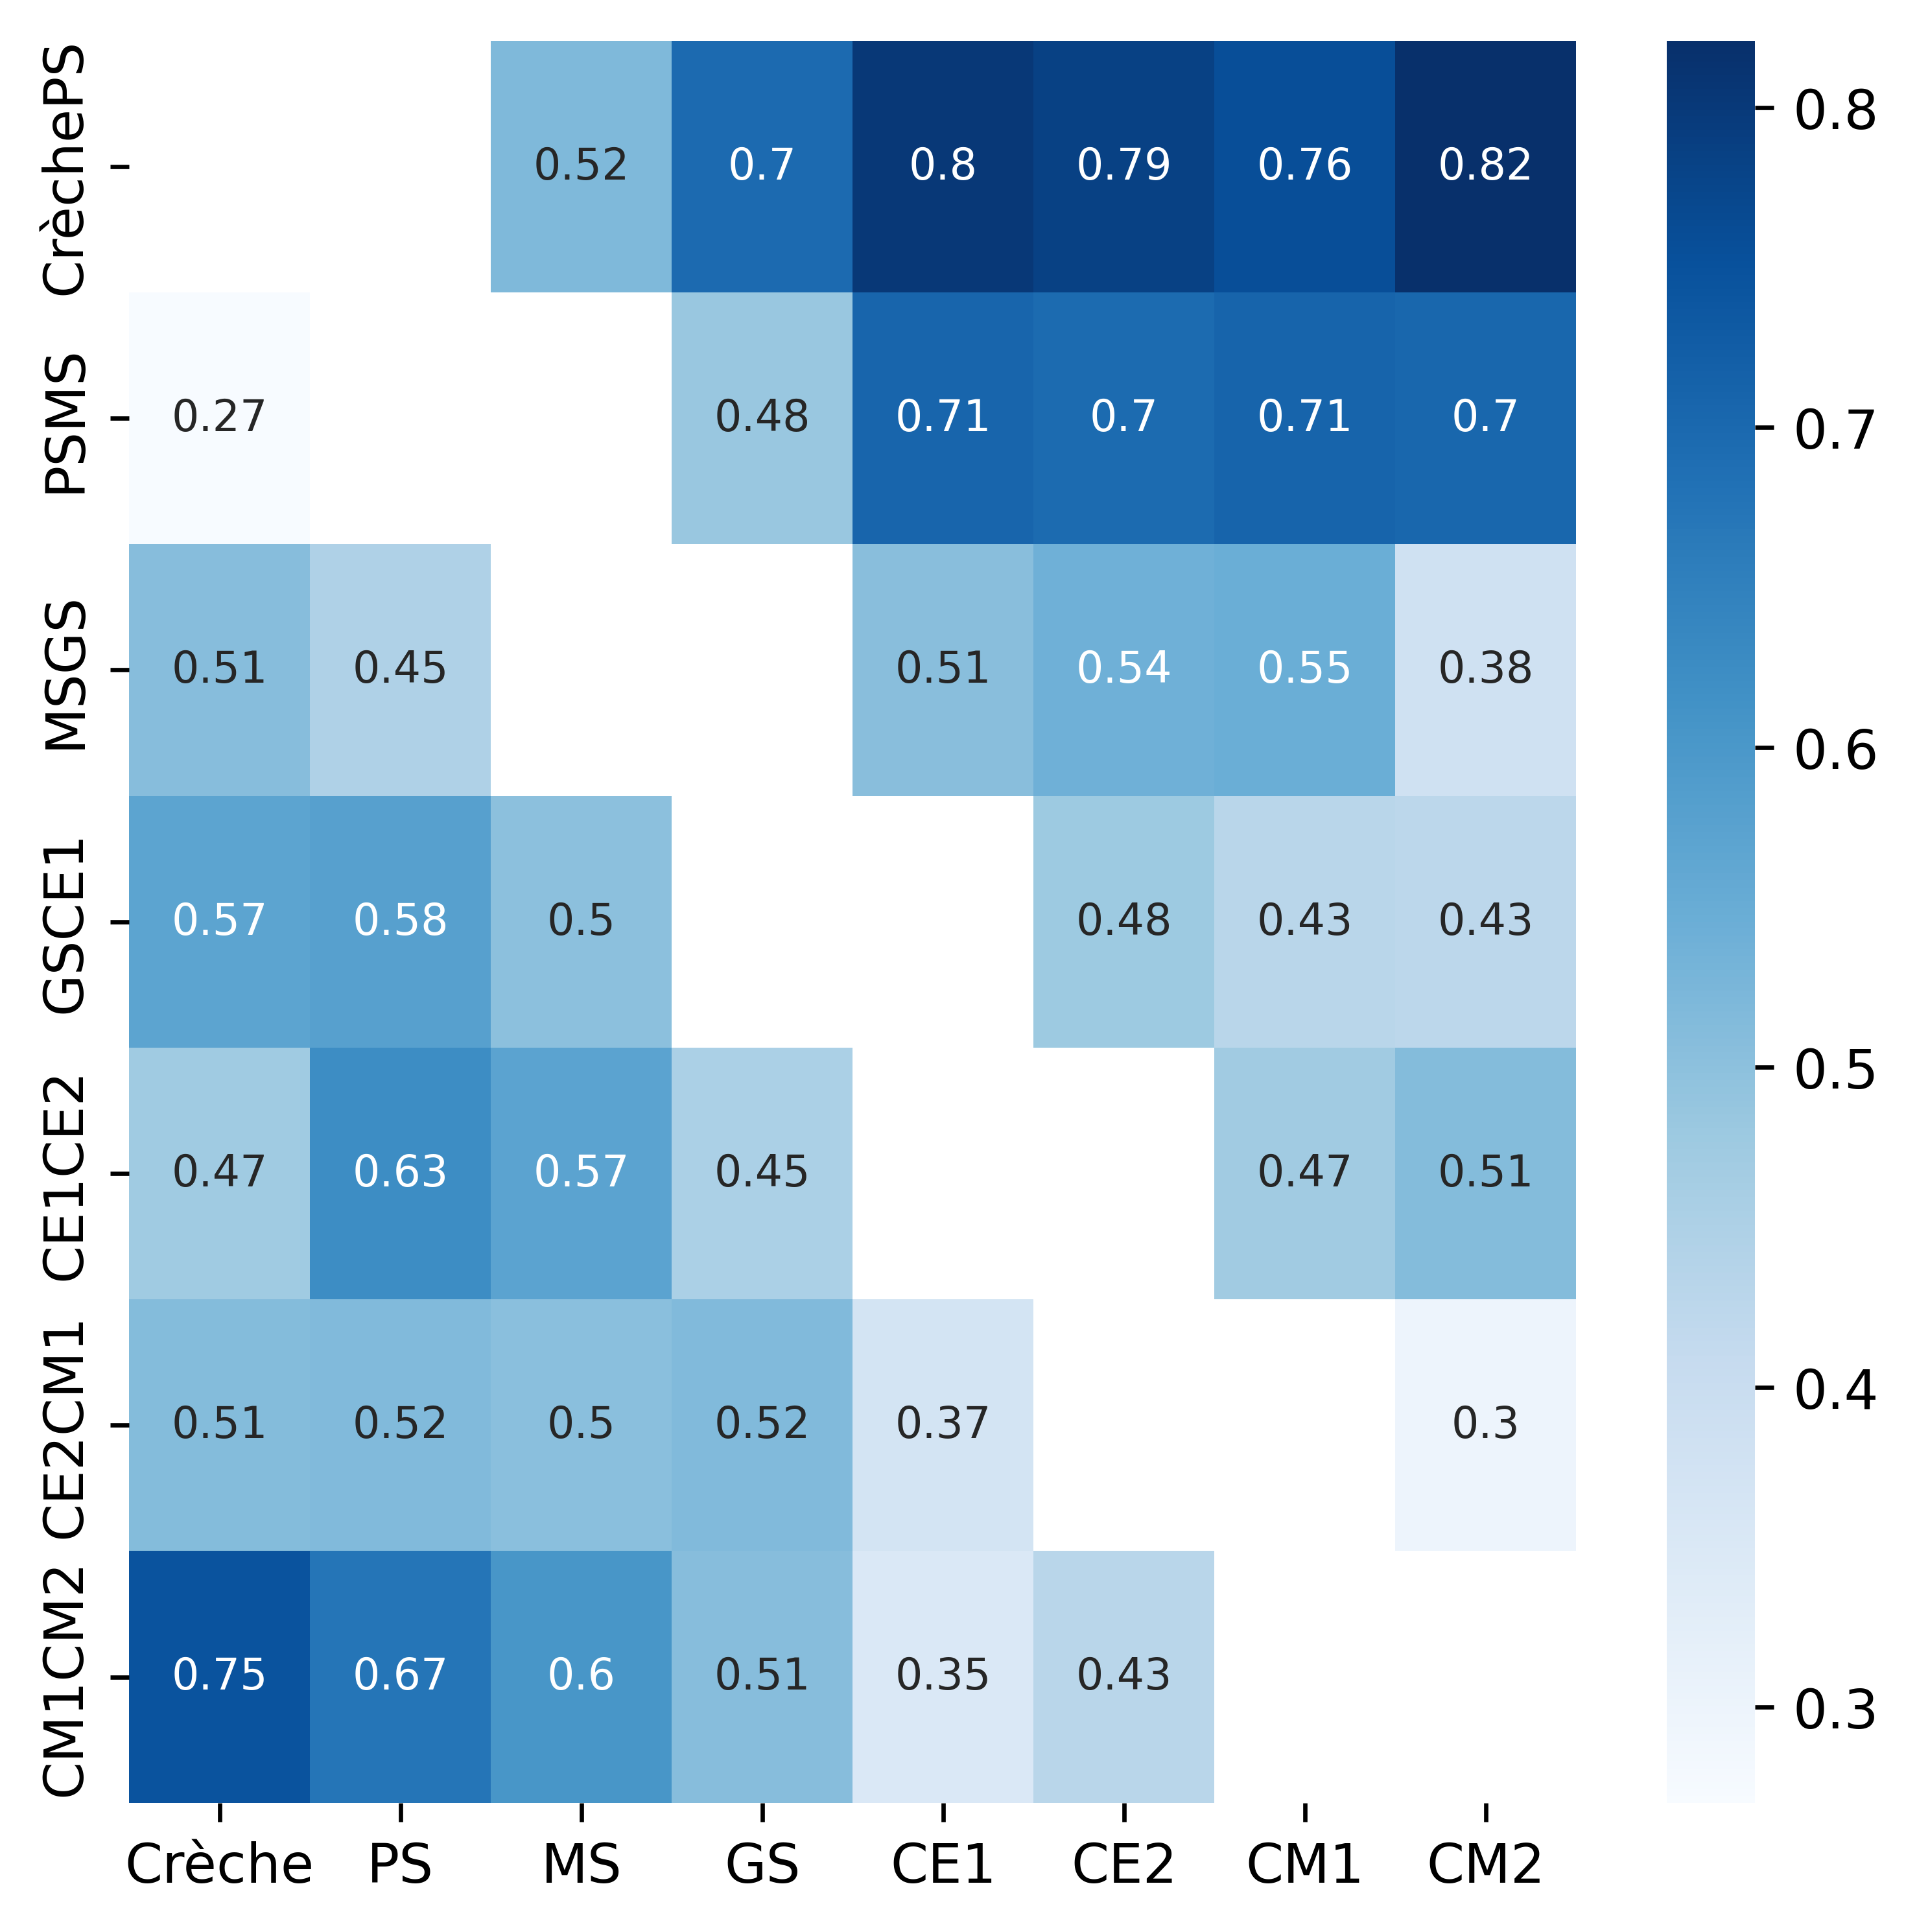

In [68]:
import seaborn as sns

#corr = df2.corr() #your dataframe

# figsize=(6, 6) control width and height
# dpi = 600, I 
plt.figure(figsize=(6, 6), 
           dpi = 600) 
 
# parameter annot_kws={"size": 8} control corr values font size
sns.heatmap(matrix_pred, cmap="Blues", annot=True, annot_kws={"size": 8})

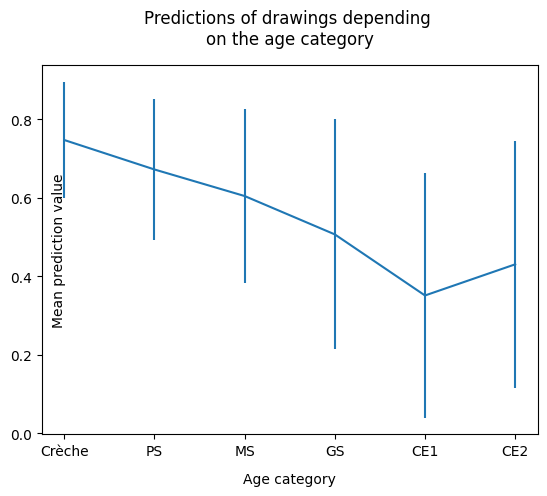

In [153]:
plt.errorbar(x=np.arange(len(categories_to_predict)), y=mean_pred, yerr=sd_pred)
plt.xticks(np.arange(len(categories_to_predict)),categories_to_predict)
#plt.yticks(np.arange(2),['CrèchePS','NOVEXP'])
plt.title('Predictions of drawings depending \non the age category', pad = 15)
plt.xlabel('Age category', labelpad = 10)
plt.ylabel('Mean prediction value', labelpad = -40)
plt.show()

In [ ]:
pred_accuracy = {}
sorted_categories = ['Chimpanzés', 'MS', 'GS', 'CE1', 'CE2', 'CM1', 'CM2']
for sorted_category in sorted_categories:
    np.where(np.array(predictions_true_label) == sorted_category)[0]